In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from models.utils import reimannian_mapping
import numpy as np
import pickle

In [5]:
with open('data/original.pkl', 'rb') as f:
    ori_data = pickle.load(f)
with open('generated_data/generated_stock_data.pkl', 'rb') as f:
    gen_data = pickle.load(f)

In [8]:
ori_data = list(ori_data)
gen_data = list(gen_data)

In [9]:
y = []
for i in range(len(ori_data)):
    y.append(1)
for i in range(len(gen_data)):
    y.append(0)

In [10]:
X = ori_data + gen_data

In [11]:
mapped_X = reimannian_mapping(X)

7322 covariances are mapped


In [12]:
flat_covs = [cov.flatten() for cov in mapped_X]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(flat_covs, y, test_size=0.2, random_state=42)

In [15]:
eval_model = SVC(kernel='rbf')

In [16]:
eval_model.fit(X_train, y_train)

SVC()

In [17]:
y_hat=eval_model.predict(X_test)

In [18]:
accuracy_score(y_test, y_hat)

0.9658703071672355

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
conf_mat = confusion_matrix(y_test, y_hat, normalize='true')

In [22]:
import seaborn as sns

<Axes: >

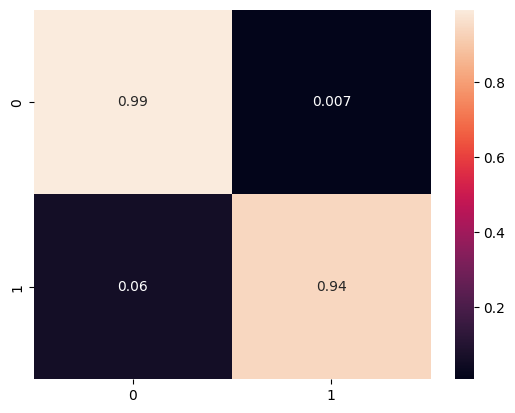

In [23]:
sns.heatmap(conf_mat, annot=True)